# <div align="center">Exploring the Predictive Power of Google Trends on Bitcoin Price and Trading Volume</div>
<div align="center"><img src="../images/btclogo.png" alt="btc logo"> <img src="../images/gtlogo.png" alt="gt logo"></div>
By Erik Pfeffer
<hr>
<strong><u>Introduction</u></strong>
<br/>
<br/>
<strong>Importance of Analyzing Bitcoin Trends</strong>
<br/>
The importance of analyzing trends in Bitcoin cannot be overstated, as it stands as one of the most influential and highly volatile digital assets in the financial market today. Bitcoin's price fluctuations can be sudden and driven by various factors including market sentiment, regulatory news, and technological developments. Investors, traders, and financial analysts closely monitor these trends to make informed decisions, as understanding these movements can lead to significant financial gain or prevent potential losses. Moreover, as cryptocurrencies gain mainstream acceptance, the economic implications of their fluctuations become increasingly impactful not just for individual investors but also for businesses and entire economies engaging with digital currencies.
<br/>
<br/>
<strong>What is Google Trends and Bitcoin</strong>
<br/>
Google Trends is a web service provided by Google that analyzes the popularity of top search queries in Google Search across various regions and languages. The service provides graphs to compare the search volume of different queries over time, offering insights into public interest or awareness about specific topics. Bitcoin, on the other hand, is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Introduced by an anonymous entity named Satoshi Nakamoto, Bitcoin is the first and most well-known cryptocurrency, embodying a new genre of asset that combines technology, economics, and digital security.
<br/>
<br/>
<strong>Purpose</strong>
<br/>
The purpose of this project is to explore whether Google Trends can serve as an effective indicator for predicting Bitcoin's volume and price movements. By examining the correlation between public interest as represented by search frequency in Google Trends and Bitcoin's market behavior, this study aims to uncover potential predictive relationships that could assist investors, financial analysts, and enthusiasts in making more informed and strategic investment decisions. Additionally, this project could provide deeper insights into how digital information consumption can influence, or reflect, real-world financial markets, thereby contributing to the broader understanding of digital economics.
<hr>

# Table of Contents
- [Data Collection](#data-collection)
- [Exploratory Data Analysis](#eda)
- [Hypothesis Testing](#hyp-testing)
- [Machine Learning](#ml)
- [Conclusion](#conclusion)

<hr>

## Imports
Here are the imports we will use throughout this tutorial

In [2]:
# Imports
# Standard libraries
import numpy as np
import pandas as pd
from datetime import datetime
from io import StringIO

# Data manipulation and statistical analysis
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Data Collection <a class="anchor" id="data-collection"></a>
<hr>
The first piece of data we will collect comes from downloading the data from
Google Trends using this <a href="https://trends.google.com/trends/explore?date=now%201-d&geo=US&q=%2Fm%2F05p0rrx&hl=en">link</a>.<br>
For the sake of this tutorial, we will be looking at the Google Trend values from the weeks of 04/30/2023-04/28/2024, about a year in total.
<br>
<br>
To begin, we'll open the file using pandas' <i>read_csv</i> function, and rename the "Week" and "Bitcoin: (United States)" columns to "Date" and Google_Trend_Value", respectively. <br>
We will also set that "Date" column to be a <i>datetime</i> column and make it our index.<br>
Let's see the first 5 rows so far using the <i>head</i> function.

In [3]:
# Opening Google Trends Bitcoin data
bitcoin_df = pd.read_csv("../data/bitcoinTrend.csv")
#bitcoin_df = pd.read_csv("../data/bitcoinTrend5y.csv")
bitcoin_df.rename(columns={'Week': 'Date', 'Bitcoin: (United States)': 'Google_Trend_Value'}, inplace=True)
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.head()

,Google_Trend_Value
Date,
2023-04-30,31
2023-05-07,30
2023-05-14,28
2023-05-21,27
2023-05-28,26


<hr><div align="center"><img src="../images/yahlogo.png" alt="yahoo logo"></div><br>
Nice! Now that we have our Google Trend values, let's now use some webscraping to collect the corresponding Bitcoin (BTC) <br>
prices for that time period. To do this, we'll get our data from Yahoo! Finance using this <a href="https://finance.yahoo.com/quote/BTC-USD/history/?period1=1682812800&period2=1714262400">link</a>. We'll use our <i>Selenium</i> imports to get the page's source <br>
and have <i>BeautifulSoup</i> parse the ugly HTML for us.

In [4]:
# Getting the relevant Bitcoin prices from Yahoo Finance.
url = "https://finance.yahoo.com/quote/BTC-USD/history/?period1=1682812800&period2=1714262400"
#url = 'https://finance.yahoo.com/quote/BTC-USD/history?period1=1557014400&period2=1714780800'
driver = webdriver.Chrome()
driver.get(url)
html = driver.page_source

# Using BeautifulSoup to parse the html
bs = BeautifulSoup(html)

driver.close()

Using some more <i>BeautifulSoup</i>, we'll find the table that holds the relevant BTC data and do some string conversions to allow pandas to parse the<br>BTC data into a nice data frame for us. Similarly to we we did before, we'll rename the columns into names more suitable for us.

In [5]:
btc_table = bs.find('table', class_='table svelte-ewueuo')
btc_data = StringIO(str(btc_table))
btc_df = pd.read_html(btc_data)[0]

# Adjusting the column names
btc_df.rename(columns={'Close Close price adjusted for splits.': 'Close', 'Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.': 'Adj Close'}, inplace=True)
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 28, 2024",63423.52,64321.48,62793.60,63113.23,63113.23,17334827993
1,"Apr 27, 2024",63750.99,63898.36,62424.72,63419.14,63419.14,19530783039
2,"Apr 26, 2024",64485.37,64789.66,63322.40,63755.32,63755.32,24139372950
3,"Apr 25, 2024",64275.02,65275.21,62783.63,64481.71,64481.71,32155786816
4,"Apr 24, 2024",66408.72,67075.37,63589.87,64276.90,64276.90,30276655120


One last thing for us to do is turn the daily data we got from Yahoo into weekly averages to match with the Google Trends values we have.<br>Luckily, pandas again provides us with two useful functions, <i>resample</i> and <i>mean</i>, to do a lot of the heavy lifting for us.<br>Like we did before as well, we need to first make the "Date" column into <i>datetime</i> objects and make it the data frame's index.

In [6]:
# Since the dates in google trends are weekly, let's get the weekly avg for the dates here
btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%b %d, %Y')
btc_df.set_index('Date', inplace=True)
btc_weekly_averages = btc_df.resample('W').mean()
btc_weekly_averages.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-30,29245.520000,29952.030000,29114.020000,29268.810000,29268.810000,1.465220e+10
2023-05-07,28902.575714,29352.931429,28319.027143,28788.587143,28788.587143,1.641599e+10
2023-05-14,27429.380000,27666.630000,26800.270000,27213.615714,27213.615714,1.570850e+10
2023-05-21,27053.431429,27346.830000,26701.528571,27033.414286,27033.414286,1.206568e+10
2023-05-28,26746.490000,27185.075714,26447.274286,26937.332857,26937.332857,1.286472e+10


Our two data frames are now setup in such a manner that we can simply merge on their indexes to create the data frame we'll use for the rest of this tutorial.

In [7]:
df = btc_weekly_averages.merge(bitcoin_df, left_on='Date', right_on='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Google_Trend_Value
Date,,,,,,,
2023-04-30,29245.520000,29952.030000,29114.020000,29268.810000,29268.810000,1.465220e+10,31
2023-05-07,28902.575714,29352.931429,28319.027143,28788.587143,28788.587143,1.641599e+10,30
2023-05-14,27429.380000,27666.630000,26800.270000,27213.615714,27213.615714,1.570850e+10,28
2023-05-21,27053.431429,27346.830000,26701.528571,27033.414286,27033.414286,1.206568e+10,27
2023-05-28,26746.490000,27185.075714,26447.274286,26937.332857,26937.332857,1.286472e+10,26


# Exploratory Data Analysis <a class="anchor" id="eda"></a>
<hr>
Now that we have our final data frame, let's start doing some EDA on it to see what trends we can uncover.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2023-04-30 to 2024-04-28
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                53 non-null     float64
 1   High                53 non-null     float64
 2   Low                 53 non-null     float64
 3   Close               53 non-null     float64
 4   Adj Close           53 non-null     float64
 5   Volume              53 non-null     float64
 6   Google_Trend_Value  53 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 3.3 KB


In [284]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Google_Trend_Value
count,53.000000,53.000000,53.000000,53.000000,53.000000,5.300000e+01,53.000000
mean,39103.696092,39842.215526,38399.231159,39195.651968,39195.651968,2.158761e+10,40.245283
std,14253.684920,14715.445738,13717.195415,14308.919259,14308.919259,1.163578e+10,18.409765
min,25899.082857,26088.050000,25549.804286,25888.485714,25888.485714,9.973516e+09,22.000000
25%,27720.478571,28055.090000,27114.212857,27468.638571,27468.638571,1.292729e+10,28.000000
50%,33398.844286,34695.485714,33098.468571,34026.440000,34026.440000,1.863427e+10,34.000000
75%,43807.882857,44774.985714,42828.965714,44035.484286,44035.484286,2.407050e+10,47.000000
max,70257.697143,72044.720000,68761.497143,70170.687143,70170.687143,5.799396e+10,100.000000


Let's begin visualising our data, starting with seeing how BTC's prices (Open, High, Low, and Close) have changed over the past year.

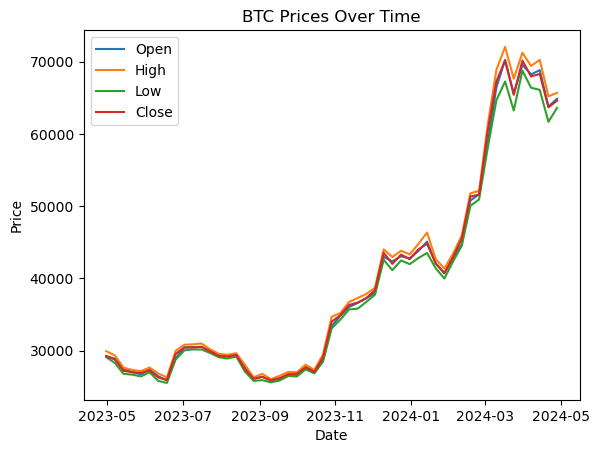

In [285]:
# Plotting open, high, low, and close prices
# Plotting each stock price
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')

# Adding title and labels
plt.title('BTC Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Show the plot
plt.show()

For both the Volume and Google Trend Value columns, we'll plot bar graphs to see these changes over time.

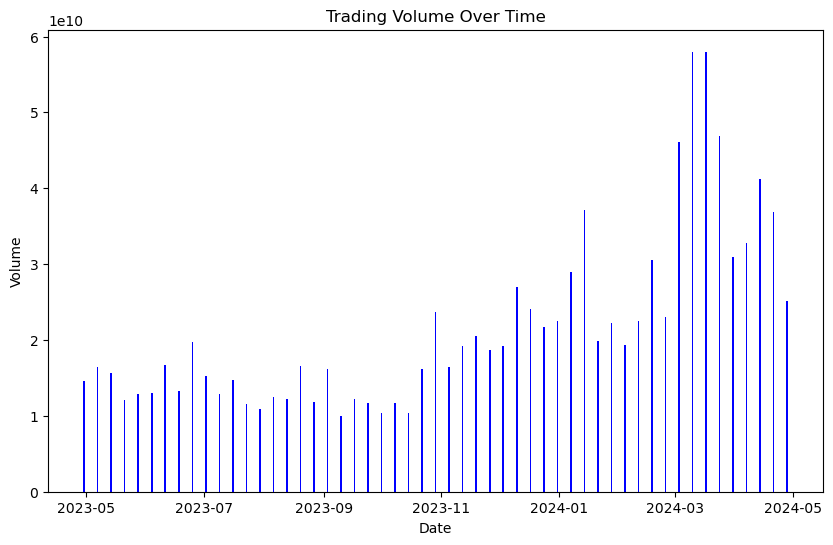

In [286]:
# Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Volume'], color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

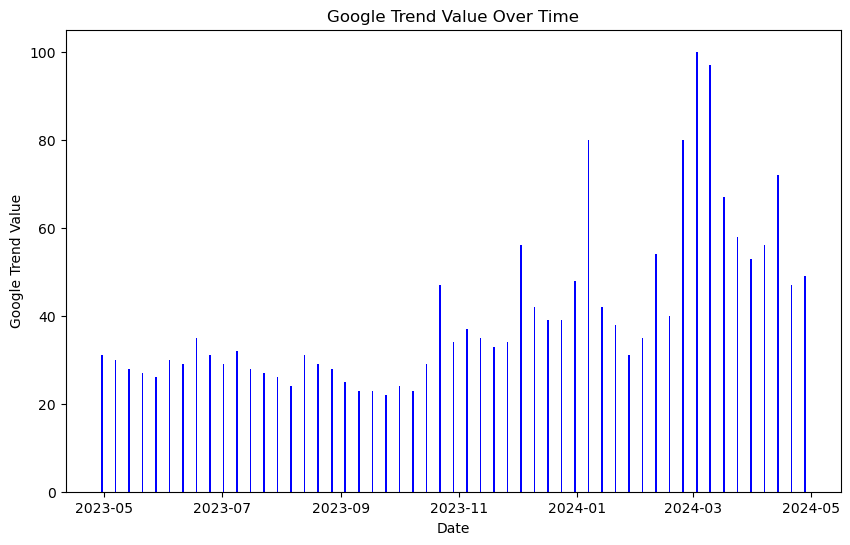

In [287]:
# Google Trend Value Analysis
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Google_Trend_Value'], color='blue')
plt.title('Google Trend Value Over Time')
plt.xlabel('Date')
plt.ylabel('Google Trend Value')
plt.show()

The code below conducts a volatility analysis by first calculating the percentage change in closing prices, which we'll call "Weekly Returns". These returns are then used to compute the rolling standard deviation over a 21-day window, representing the BTC's volatility, which is stored in a column called 'Volatility'. Finally, we'll visualize the volatility using a line graph, allowing for easy identification of periods with high or low price fluctuations. This analysis is crucial for investors and financial analysts as it helps assess risk, inform investment strategies, and understand market sentiment, highlighting how sensitive an asset is to changes in market conditions over a specified timeframe.

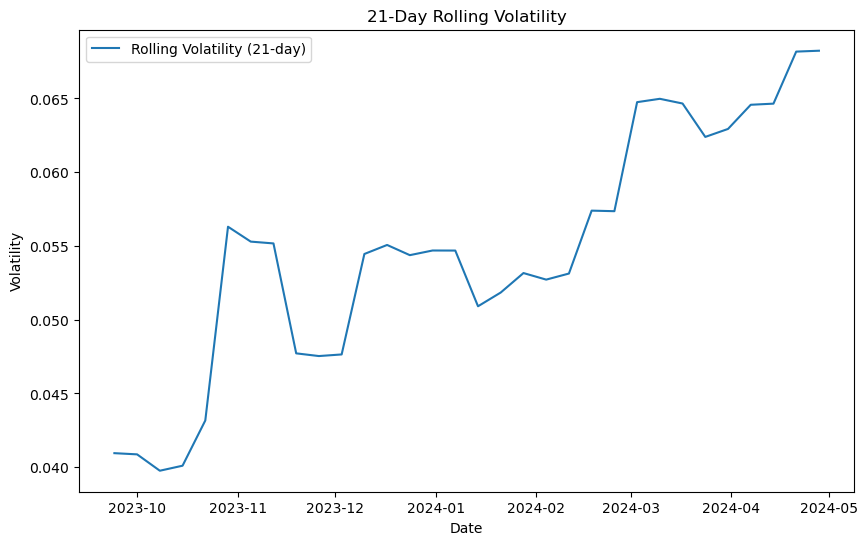

In [288]:
# Volatility Analysis
# Calculate daily returns
temp_df = df
temp_df['Weekly_Returns'] = temp_df['Close'].pct_change()

# Calculate the rolling standard deviation of weekly returns (volatility)
temp_df['Volatility'] = temp_df['Weekly_Returns'].rolling(window=21).std()

# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(temp_df['Volatility'], label='Rolling Volatility (21-day)')
plt.title('21-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

To aid even further on our conquest to see how Google Trend values (GTV) can serve as an indicator for BTC's prices and Volume,
<br>let's add an overlay to get a quick visual on how the GTV might correlate with both price and volume. This can help us<br>
spot trends such as increased or decreased prices and volume based on the GTV score.

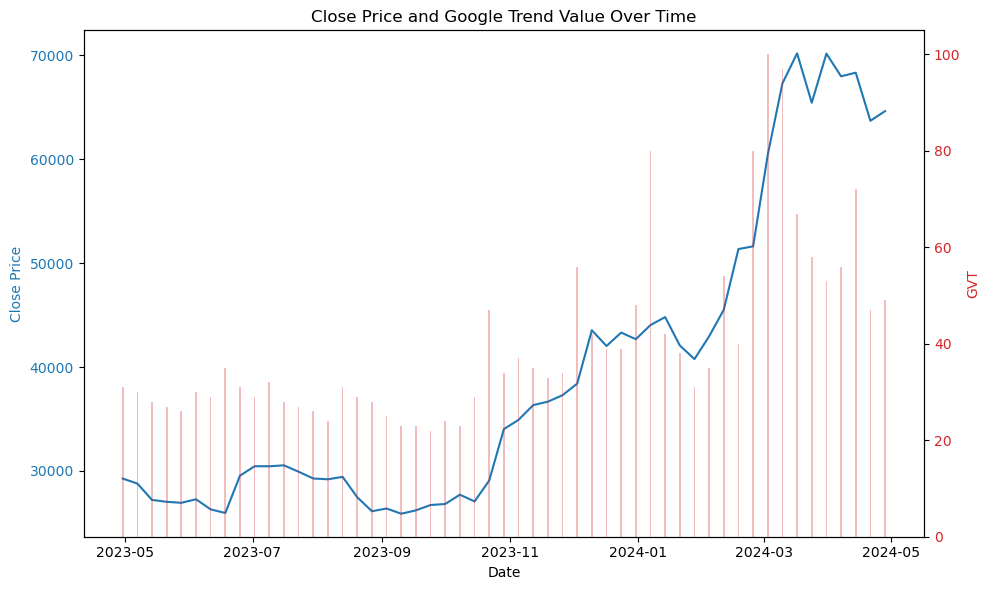

In [289]:
# Overlaying GTV on close prices.
# Create a figure and an axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'Close' price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df.index, df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis for the same x-axis

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('GVT', color=color)  # we already handled the x-label with ax1
ax2.bar(df.index, df['Google_Trend_Value'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and a legend
plt.title('Close Price and Google Trend Value Over Time')
fig.tight_layout() 

# Show the plot
plt.show()

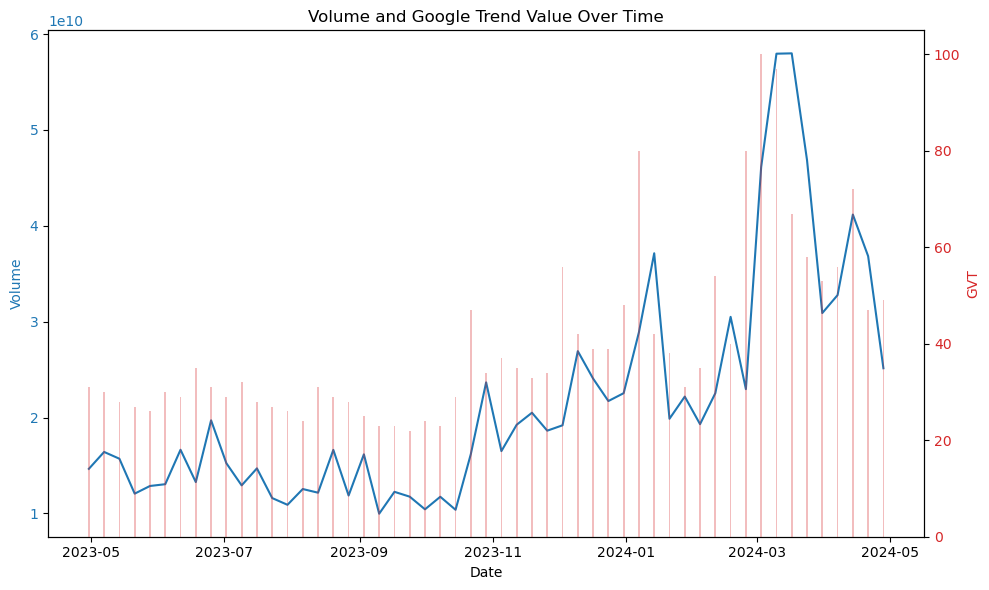

In [290]:
# Create a figure and an axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'Close' price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color=color)
ax1.plot(df.index, df['Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis for the same x-axis

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('GVT', color=color)  # we already handled the x-label with ax1
ax2.bar(df.index, df['Google_Trend_Value'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and a legend
plt.title('Volume and Google Trend Value Over Time')
fig.tight_layout() 

# Show the plot
plt.show()

As we can see, the lines seem to follow the bars as they move up and down based on the GTV, so we may be onto something!
<hr>
Let's now create scatterplots to see how google trends values affect these attributes.

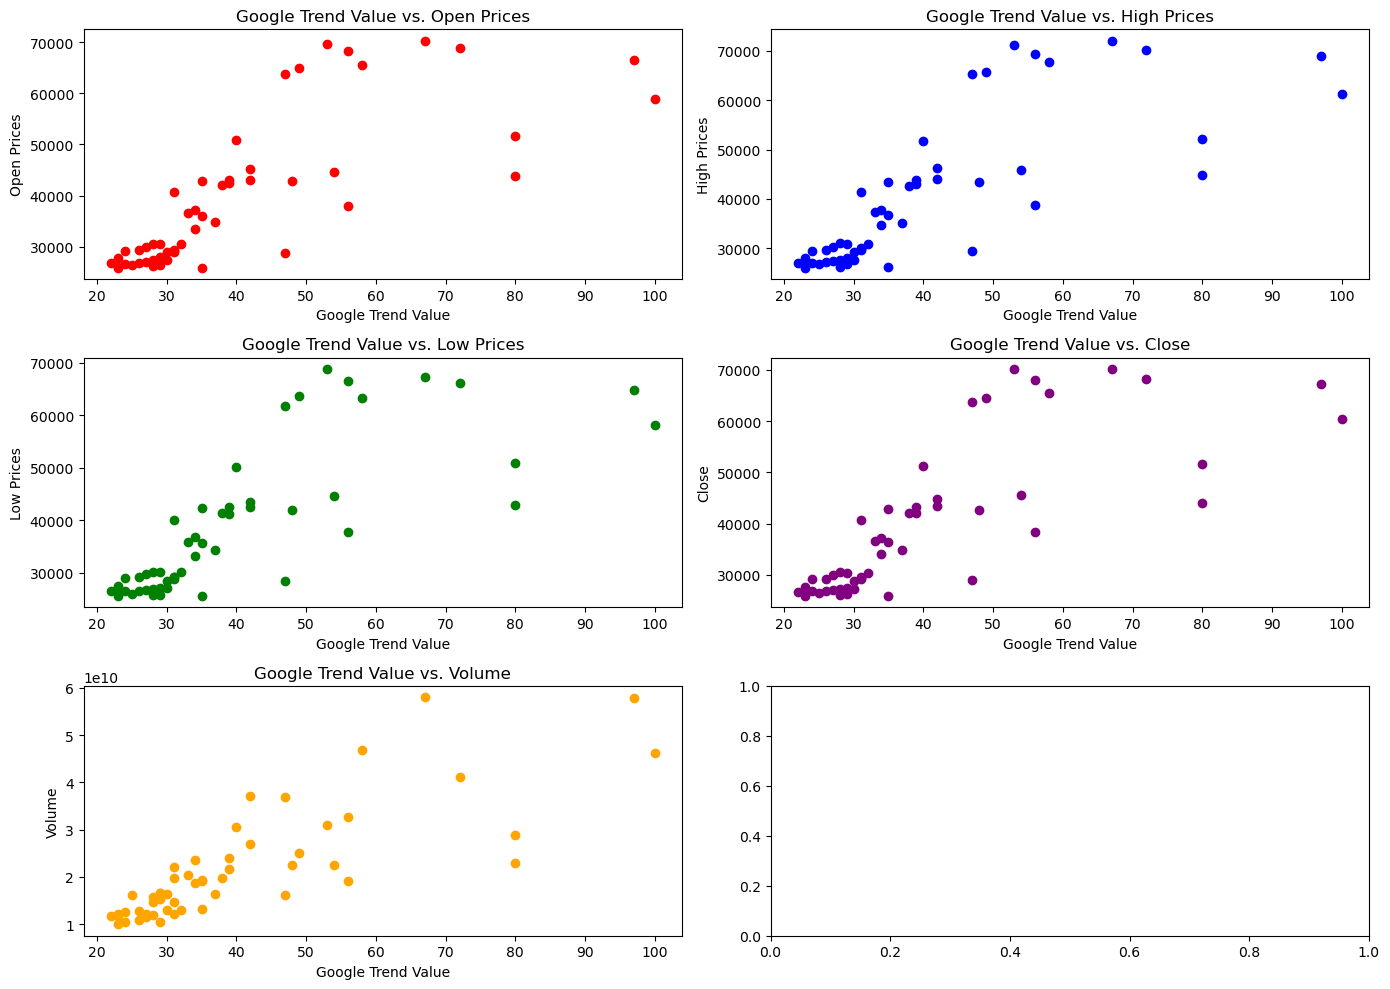

In [291]:
# Setting up a 2-by-2 subplot.
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

axs[0, 0].scatter(df['Google_Trend_Value'], df['Open'], color='red')
axs[0, 0].set_title('Google Trend Value vs. Open Prices')
axs[0, 0].set_xlabel('Google Trend Value')
axs[0, 0].set_ylabel('Open Prices')

axs[0, 1].scatter(df['Google_Trend_Value'], df['High'], color='blue')
axs[0, 1].set_title('Google Trend Value vs. High Prices')
axs[0, 1].set_xlabel('Google Trend Value')
axs[0, 1].set_ylabel('High Prices')

axs[1, 0].scatter(df['Google_Trend_Value'], df['Low'], color='green')
axs[1, 0].set_title('Google Trend Value vs. Low Prices')
axs[1, 0].set_xlabel('Google Trend Value')
axs[1, 0].set_ylabel('Low Prices')

axs[1, 1].scatter(df['Google_Trend_Value'], df['Close'], color='purple')
axs[1, 1].set_title('Google Trend Value vs. Close')
axs[1, 1].set_xlabel('Google Trend Value')
axs[1, 1].set_ylabel('Close')

axs[2, 0].scatter(df['Google_Trend_Value'], df['Volume'], color='orange')
axs[2, 0].set_title('Google Trend Value vs. Volume')
axs[2, 0].set_xlabel('Google Trend Value')
axs[2, 0].set_ylabel('Volume')

plt.tight_layout()
plt.show()

Just by looking at these graphs, we can see the makings of a linear trend from these relationships of prices and volume to the GTV.<br>For the rest of this tutorial, we further explore GTV's relationship with "Close Price" and "Volume"
<hr>
<h3>Is GTV Predictive or Reactive of Bitcoin Price?</h3>

Now let's see if we can discover whether GTVs are a consequence of people reacting to increasing/decreasing Bitcoin
price, or if they can be a predictor for Bitcoin prices. To achieve this we will "lag" the data.

Lagging data in the context of time series analysis like examining GTVs versus Bitcoin prices involves shifting the data points of one time series relative to another. This method is very important when it comes to trying to understand the temporal relationship between two variables specifically. As mentioned before, we want to see which variable might be leading (predictive) or lagging (reactive) with respect to the other.

We will shift the GTVs ahead by one. This means that the GTV for 4-30 will be pushed to the week of 5-7, 5-7's GTV is push to 5-14, etc. First, we will plot this out to visualize this trend.

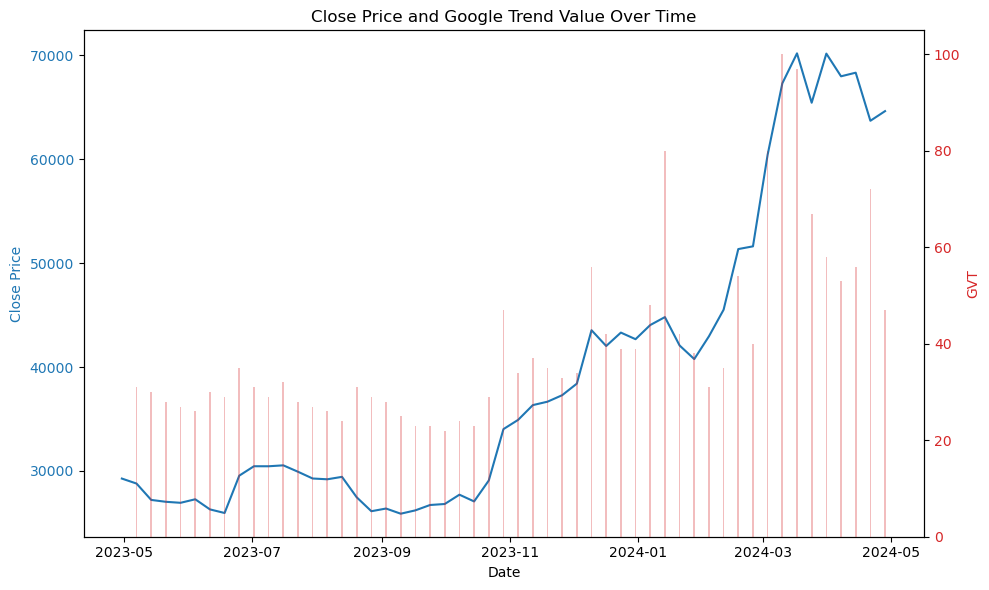

In [56]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'Close' price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df.index, df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis for the same x-axis

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('GVT', color=color) 
ax2.bar(df.index, df['Google_Trend_Value'].shift(1), color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and a legend
plt.title('Close Price and Lagged Google Trend Value Over Time')
fig.tight_layout() 

# Show the plot
plt.show()

It appears that when shifted by 1 week, the GTVs match up with the close price fairly nicely.

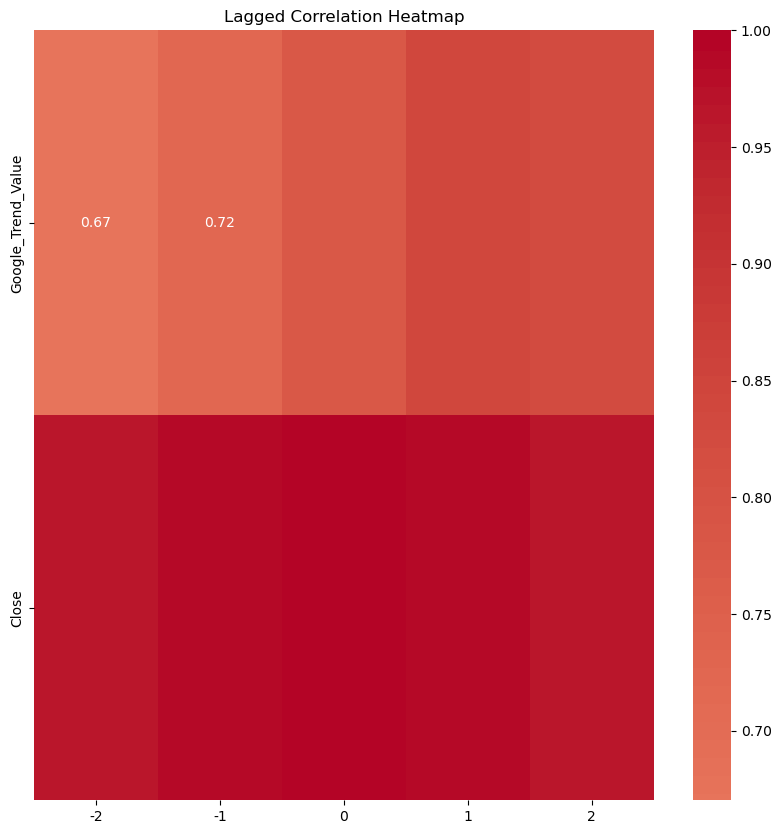

In [12]:
def lagged_correlation_heatmap(data, lags, figsize=(10, 10)):
    correlations = pd.DataFrame(index=data.columns, columns=np.arange(-lags, lags + 1))
    
    for lag in range(-lags, lags + 1):
        shifted = data.shift(lag).corrwith(data['Close'])
        correlations[lag] = shifted
    
    plt.figure(figsize=figsize)
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Lagged Correlation Heatmap')
    plt.show()

lagged_correlation_heatmap(df[['Google_Trend_Value', 'Close']], lags=2)

From this heatmap, we can see a few insights. First, it is important to note that The 'Google Trend Value' row shows correlation values with the 'Close' price at different lags. At lag 0 (the 'Google Trend Value' row, center column), the correlation appears relatively strong (somewhat higher than 0.72), suggesting a potentially significant relationship between Google Trends and Bitcoin closing prices. For the positive lags of +1 & +2, we can see them being darker than the -1 & -2 lags. This indicates a stronger positive relationship, meaning it would be appear Google Trend Values have a slighty more reactive than predictive relationship with Bitcoin prices.

<h3>Granularity Test</h3>

Granger causality tests determine whether one time series can predict another. The output includes several statistics, but the most crucial are:

p-values: These test the null hypothesis that the lagged values of the predictor do not Granger-cause the response variable. If the p-value is less than a significance level (we will select 0.05 which we will also use for hypothesis testing), you reject the null hypothesis, suggesting that the predictor does Granger-cause the response.

F-statistic: This measures the overall significance of the test. A higher F-statistic indicates a stronger causal relationship.

Let's us this test to see if we can make similar conclusions as we did with the heatmap

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lags = 5
# The 1st parameter is the data for testing whether the time series in the second column Granger causes the time series in the first column. 
gc_results = grangercausalitytests(df[['Close', 'Google_Trend_Value']], maxlag=max_lags)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.1262 , p=0.0000  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=21.3584 , p=0.0000  , df=1
likelihood ratio test: chi2=17.8939 , p=0.0000  , df=1
parameter F test:         F=20.1262 , p=0.0000  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.7940 , p=0.0000  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=30.5866 , p=0.0000  , df=2
likelihood ratio test: chi2=23.9618 , p=0.0000  , df=2
parameter F test:         F=13.7940 , p=0.0000  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.1240  , p=0.0001  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=31.8277 , p=0.0000  , df=3
likelihood ratio test: chi2=24.6297 , p=0.0000  , df=3
parameter F test:         F=9.1240  , p=0.0001  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.6494  , p=0.0000  , df_d

The p-values for all lags (1 through 5) are extremely low (p=0.0000 for most tests, p=0.0001 for one instance at lag 3). These low p-values indicate strong evidence against the null hypothesis, which in the context of the Granger causality test, is that the lagged values of the GTV do not have a statistically significant effect on Bitcoin's close prices. 

These results strongly suggest that the lagged GTVs Granger-causes the close price. This seems to contradict our heatmap's conclusion, but we will continue with more analysis.

# Hypothesis Testing <a class="anchor" id="hyp-testing"></a>
<br>
Let's start by Formulating our hypotheses for our hypothesis testing. For both tests, we'll choose a significance level of &alpha; = 0.05. We'll begin with the "Close" price:<br>
H<sub>0</sub>: Google Trend Values have no effect on BTC "Close" prices.<br>
H<sub>a</sub>: Google Trend Values have a significant effect on BTC "Close" prices.

In [292]:
import statsmodels.api
result_close = statsmodels.formula.api.ols(formula="Close ~ Google_Trend_Value", data=df).fit()
result_close.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     79.67
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.36e-12
Time:                        15:27:26   Log-Likelihood:                -556.91
No. Observations:                  53   AIC:                             1118.
Df Residuals:                      51   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.477e+04   3004.290      4.917      0.000    8739.671    2.08e+04
Google_Trend_Value   606.8939     67.995      8.926      0.000     470.388     743.400
==============================================================================
Omnibus:                        6.999   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.008
Skew:                           0.760   Prob(JB):                       0.0496
Kurtosis:                       3.638   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<hr>As we can see from the OLS Regression results, the outputs of P>|t| for both the <strong>Intercept</strong> and the <strong>GTV Coeffcient</strong><br>are both lower than our chosen significance value, meaning these results are statistically significant.<br>This allows use to confidently reject of null hypothesis and determine that the GTV <i>does</i> have a significant effect on BTC "Close" prices.
<hr>
Now we'll conduct the same analysis for BTC's trade volume:<br>
H<sub>0</sub>: Google Trend Values have no effect on Bitcoin's trade volume.<br>
H<sub>a</sub>: Google Trend Values have a significant effect on Bitcoin's trade volume.

In [293]:
result_volume = statsmodels.formula.api.ols(formula="Volume ~ Google_Trend_Value", data=df).fit()
result_volume.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     98.70
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.61e-13
Time:                        15:27:27   Log-Likelihood:                -1274.6
No. Observations:                  53   AIC:                             2553.
Df Residuals:                      51   BIC:                             2557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.334e+08   2.28e+09      0.409      0.684   -3.65e+09    5.52e+09
Google_Trend_Value  5.132e+08   5.17e+07      9.935      0.000    4.09e+08    6.17e+08
==============================================================================
Omnibus:                       11.122   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.068
Skew:                           0.626   Prob(JB):                     0.000197
Kurtosis:                       5.482   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similarly to before, the <strong>GTV Coefficient</strong> is lower than our significance level, allowing us to, again, reject our<br>null hypothesis and conclude that the GTV <i>does</i> have a significant effect on BTC's trading volume.
<hr>

# Machine Learning <a class="anchor" id="ml"></a>
<br>
Now that we've successfully concluded our hypothesis testing, we can move on to doing some machine learning!<br>
For this tutorial we'll use Linear Regression and the Random Forest Regressor for our anaylsis. For determining how well our models do, we'llsee how their Mean Squared Error (MSE) and R<sup>2</sup> values turnout.<br><br>For reference, MSE is a metric that measures the average of the squares of the errors, specifically the difference between the original values and the predicted values, <br>providing a clear indicator of the model's prediction accuracy where lower values indicate better performance.<br>R<sup>2</sup> quantifies the percentage of the variance in the dependent variable that is predictable from the independent variables, offering an insight into the goodness of fit of the model, where a higher R<sup>2</sup> value closer to 1 suggests a better model fit.<br> Let's start with Linear Regression:

In [294]:
# Let's start with GVT vs. Close price using LR.
X = df[['Google_Trend_Value']]  # Features
y = df['Close']  # Target

scaler = StandardScaler()
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
close_lr = LinearRegression()

# Fit the model on the training data
close_lr.fit(X_train, y_train)

# Make predictions on the test data
close_lr_pred = close_lr.predict(X_test)

# Calculate and print the performance metrics
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, close_lr_pred))
print("R^2 Score:", r2_score(y_test, close_lr_pred))

Linear Regression Performance:
Mean Squared Error: 54947676.01458361
R^2 Score: 0.7642127953571289


In [295]:
# Now for GVT vs. Close price using RFR
# Create a Random Forest Regressor model
close_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
close_rf.fit(X_train, y_train)

# Make predictions on the test data
close_rf_pred = close_rf.predict(X_test)

# Calculate and print the performance metrics
print("Random Forest Regressor Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, close_rf_pred))
print("R^2 Score:", r2_score(y_test, close_rf_pred)) # Talk about these metrics

Random Forest Regressor Performance:
Mean Squared Error: 43900344.40728939
R^2 Score: 0.8116182477325014


<hr>
Just by looking at the MSE and R<sup>2</sup> values from each model, it's clear that the Random Forest Regressor model performed better than the<br>Linear Regression model. Let's go more in depth with this analysis by visualizing the results of the predicted and actual values

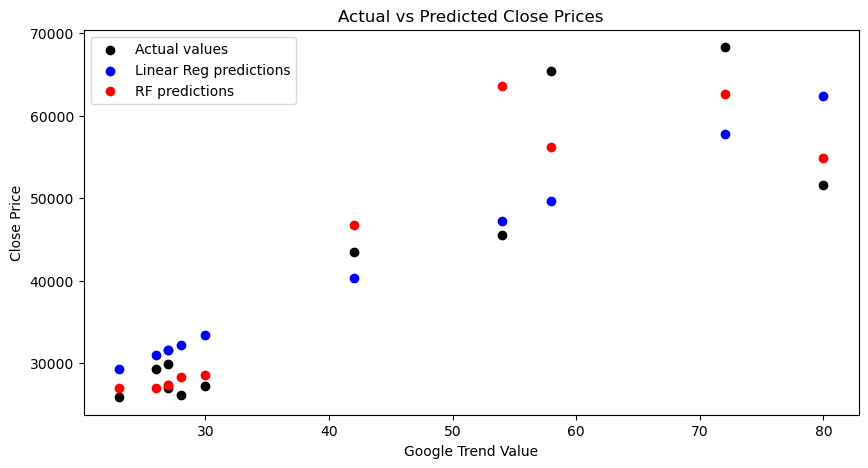

In [296]:
# Visualising 
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.scatter(X_test, close_lr_pred, color='blue', label='Linear Reg predictions')
plt.scatter(X_test, close_rf_pred, color='red', label='RF predictions')
plt.xlabel('Google Trend Value')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In general, we can see the red dots that represent the Random Forest Regressor's predictions being fairly close the the actual values in black.
<hr>
Now we'll create these models for BTC's trading volume.

In [297]:
# Now let's see GVT vs. Volume LR
X = df[['Google_Trend_Value']]  # Features
y = df['Volume']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
volume_lr = LinearRegression()

# Fit the model on the training data
volume_lr.fit(X_train, y_train)

# Make predictions on the test data
volume_lr_pred = volume_lr.predict(X_test)

# Calculate and print the performance metrics
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, volume_lr_pred))
print("R^2 Score:", r2_score(y_test, volume_lr_pred))

Linear Regression Performance:
Mean Squared Error: 7.0849602410234544e+19
R^2 Score: 0.5293799746418668


In [298]:
# Now for GVT vs. Volume using RFR
# Create a Random Forest Regressor model
volume_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
volume_rf.fit(X_train, y_train)

# Make predictions on the test data
volume_rf_pred = rf_reg.predict(X_test)

# Calculate and print the performance metrics
print("Random Forest Regressor Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, volume_rf_pred))
print("R^2 Score:", r2_score(y_test, volume_rf_pred)) # Talk about these metrics

Random Forest Regressor Performance:
Mean Squared Error: 8.051991416292845e+19
R^2 Score: 0.46514471844491123


Unlike the previous models for BTC's "Close" prices, the linear regression model performs better for BTC's trading volume.<br>
Let's again perform the same visualization on a graph for the predicted and actual values.

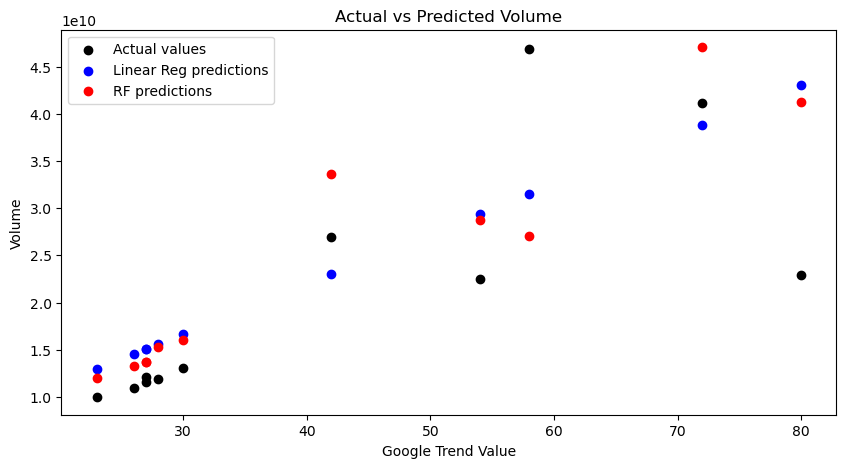

In [299]:
# Visualising 
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.scatter(X_test, volume_lr_pred, color='blue', label='Linear Reg predictions')
plt.scatter(X_test, volume_rf_pred, color='red', label='RF predictions')
plt.xlabel('Google Trend Value')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume')
plt.legend()
plt.show()

<h3>Lagging Machine Learning Models</h3>

In [62]:
# Creating lagged features
df['Google_Trends_lagged'] = df['Google_Trend_Value'].shift(1)  # Shift by 1 week

X = df[['Google_Trends_lagged']].dropna()  # Features
y = df['Close'][:-1]  # Target

scaler = StandardScaler()
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
close_lr = LinearRegression()

# Fit the model on the training data
close_lr.fit(X_train, y_train)

# Make predictions on the test data
close_lr_pred = close_lr.predict(X_test)

# Calculate and print the performance metrics
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, close_lr_pred))
print("R^2 Score:", r2_score(y_test, close_lr_pred))

Linear Regression Performance:
Mean Squared Error: 55949345.99976017
R^2 Score: 0.7599145068232014


In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))

Mean Squared Error: 41149947.36951166
R^2 Score: 0.8234205381337101


A quick note that the lagged linear model's MSE and R<sup>2</sup> was slighty worse than it's non-lagged counter part, and the MSE and R<sup>2</sup> for the lagged random forest regressor was actually better than the non-lagged counterpart. 

This suggests that lagging the GTVs ahead 1 week created just as good, if not better models in terms of MSE and R<sup>2</sup> for predicting Bitcoin prices.

# Conclusion <a class="anchor" id="conclusion"></a>
The Bitcoin market's inherent volatility makes accurately predicting its trends based on Google Trends data particularly challenging. Our machine learning models indicate that linear regression is more effective in predicting trading volume than close prices. This could be because trading volume might have a more linear relationship with public interest, as reflected in Google Trends data, where spikes in search interest often correspond to higher trading activities, regardless of the price direction. Conversely, the Random Forest Regressor demonstrated superior performance in predicting close prices. Its ensemble nature, handling non-linear relationships and interactions well, could capture the complex, non-linear relationships between Google Trend values and the market's price movements better than linear models. This divergence in predictive capabilities underscores the importance of choosing appropriate models tailored to the specific characteristics of the target variable when dealing with inherently volatile and multifaceted markets like Bitcoin.

Lastly, in terms of GTVs being more of a predictor than reactor of Bitcoin's prices, it would seem that the ladder is true in this case.
We saw with the heatmaps and the models being almost as accurate or more accurate according to their MSEs. This makes sense as people are more likely to flock to Google to search "Bitcoin" and learn why the prices surge or go down before they make any sort of investment decision.